This demonstration shows how to work with color channels to explore image compression
using the Singular Value Decomposition (SVD).

In [1]:
using Images, TestImages, LinearAlgebra

img = testimage("mandrill")
channels = channelview(float.(img))

function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    M = min.(max.(M, 0.0), 1.)
end

rank_approx (generic function with 1 method)

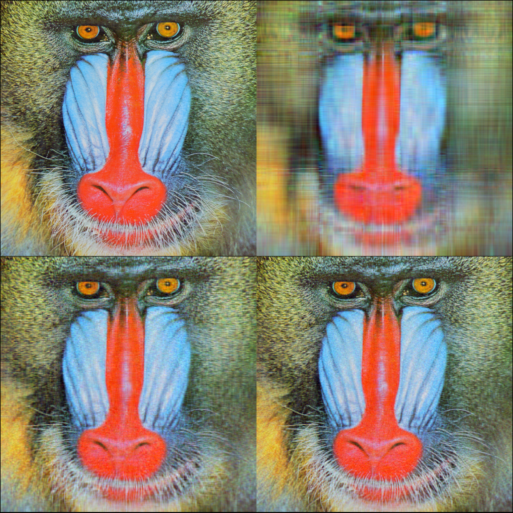

In [2]:
# after julia v1.1: svd.(eachslice(channels; dims=1))
svdfactors = (svd(channels[1,:,:]), svd(channels[2,:,:]), svd(channels[3,:,:]))
imgs = map((10, 50, 100)) do k
    colorview(RGB,
              rank_approx(svdfactors[1], k),
              rank_approx(svdfactors[2], k),
              rank_approx(svdfactors[3], k))
end

vcat([img imgs[1]], [imgs[2] imgs[3]])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*